# Space Server Project


Problem Statement:
Context -
This is the Sloan Digital Sky Survey based dataset which offers public data of space observations. The insights gained from this dataset are very useful and can force anyone to think out of the box. 

Content -
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description -
The table results from a query which joins two tables (actually views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.
To ease your start with the data you can read the feature descriptions below:
View "PhotoObj"

1) objid = Object Identifier

2) ra = J2000 Right Ascension (r-band)

3) dec = J2000 Declination (r-band)

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question.
When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.
Source: https://en.wikipedia.org/wiki/Right_ascension

4) u = better of DeV/Exp magnitude fit

5) g = better of DeV/Exp magnitude fit

6) r = better of DeV/Exp magnitude fit

7) i = better of DeV/Exp magnitude fit

8) z = better of DeV/Exp magnitude fit

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.
Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

9) run = Run Number

10) rereun = Rerun Number

11) camcol = Camera column

12) field = Field number

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:
run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. 
The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"

13) specobjid = Object Identifier

14) class = object class (galaxy, star or quasar object)

The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which you will be trying to predict.

15) redshift = Final Redshift

16) plate = plate number

17) mjd = MJD of observation

18) fiberid = fiber ID

In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

Further information on SDSS images and their attributes:

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

Inspiration -
The dataset offers plenty of information about space to explore. Also the class column is the perfect target for classification practices!



Use the link given below to download the dataset. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Space.csv')

In [3]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


In [6]:
#moving target column class to the last position

titles = list(df.columns)
titles[13], titles[17] = titles[17], titles[13]
titles

['objid',
 'ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'rerun',
 'camcol',
 'field',
 'specobjid',
 'fiberid',
 'redshift',
 'plate',
 'mjd',
 'class']

In [7]:
df = df[titles]
df.head(1)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,fiberid,redshift,plate,mjd,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.0424,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,491,-0.000009,3306,54922,2


# EDA

In [8]:
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
fiberid        892
redshift      9637
plate          487
mjd            355
class            3
dtype: int64

<AxesSubplot:xlabel='objid', ylabel='class'>

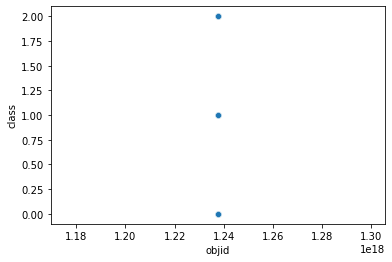

In [9]:
sns.scatterplot(data = df, x = 'objid', y = 'class')

<AxesSubplot:xlabel='ra', ylabel='class'>

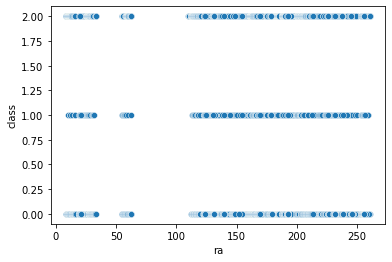

In [10]:
sns.scatterplot(data = df, x = 'ra', y = 'class')

<AxesSubplot:xlabel='dec', ylabel='class'>

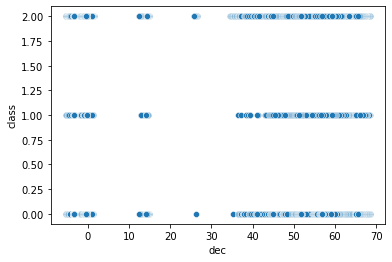

In [11]:
sns.scatterplot(data = df, x = 'dec', y = 'class')

<AxesSubplot:xlabel='u', ylabel='class'>

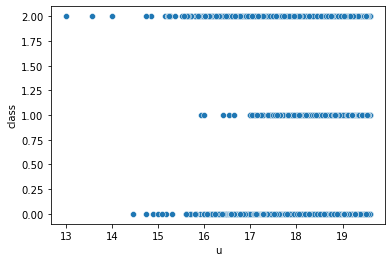

In [12]:
sns.scatterplot(data = df, x = 'u', y = 'class')

<AxesSubplot:xlabel='g', ylabel='class'>

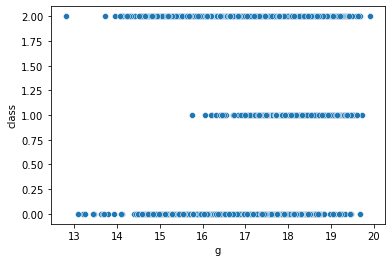

In [13]:
sns.scatterplot(data = df, x = 'g', y = 'class')

<AxesSubplot:xlabel='r', ylabel='class'>

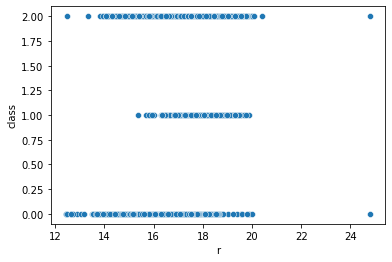

In [14]:
sns.scatterplot(data = df, x = 'r', y = 'class')

<AxesSubplot:xlabel='i', ylabel='class'>

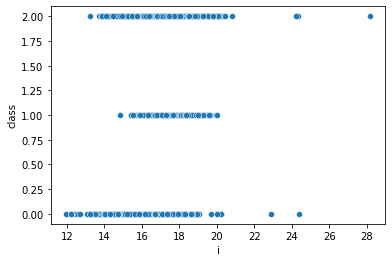

In [15]:
sns.scatterplot(data = df, x = 'i', y = 'class')

<AxesSubplot:xlabel='z', ylabel='class'>

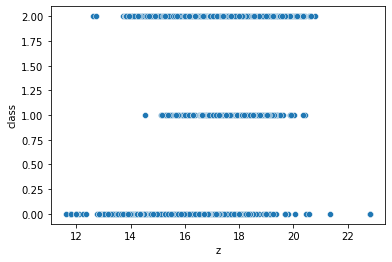

In [16]:
sns.scatterplot(data = df, x = 'z', y = 'class')

<AxesSubplot:xlabel='run', ylabel='count'>

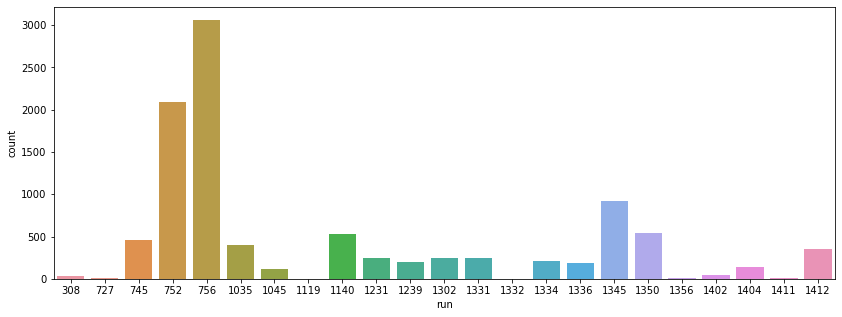

In [17]:
plt.figure(figsize = (14,5))
sns.countplot(data = df, x = 'run')

<AxesSubplot:xlabel='rerun', ylabel='class'>

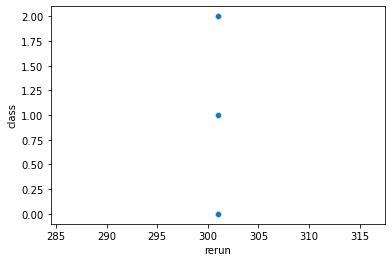

In [18]:
sns.scatterplot(data = df, x = 'rerun', y = 'class')

<AxesSubplot:xlabel='camcol', ylabel='count'>

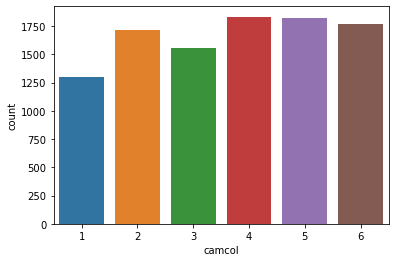

In [19]:
sns.countplot(data = df, x = 'camcol')

<AxesSubplot:xlabel='field', ylabel='class'>

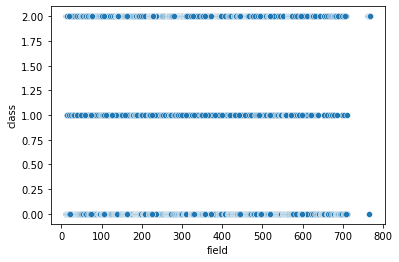

In [20]:
sns.scatterplot(data = df, x = 'field', y = 'class')

<AxesSubplot:xlabel='specobjid', ylabel='class'>

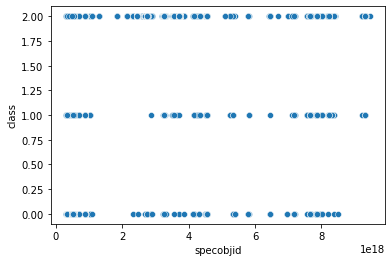

In [21]:
sns.scatterplot(data = df, x = 'specobjid', y = 'class')

<AxesSubplot:xlabel='fiberid', ylabel='class'>

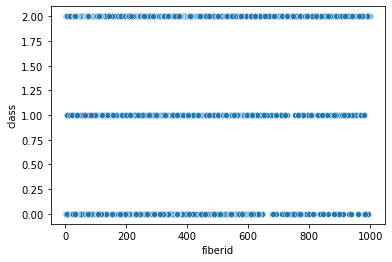

In [22]:
sns.scatterplot(data = df, x = 'fiberid', y = 'class')

<AxesSubplot:xlabel='redshift', ylabel='class'>

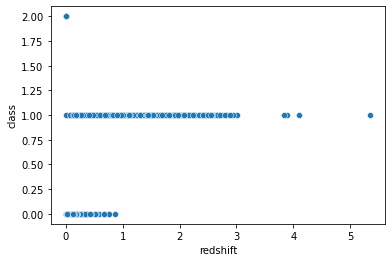

In [23]:
sns.scatterplot(data = df, x = 'redshift', y = 'class')

<AxesSubplot:xlabel='plate', ylabel='class'>

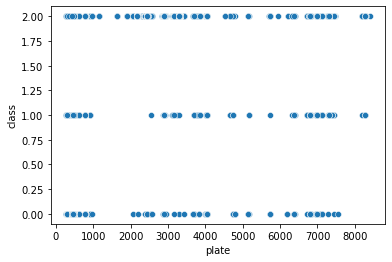

In [24]:
sns.scatterplot(data = df, x = 'plate', y = 'class')

<AxesSubplot:xlabel='mjd', ylabel='class'>

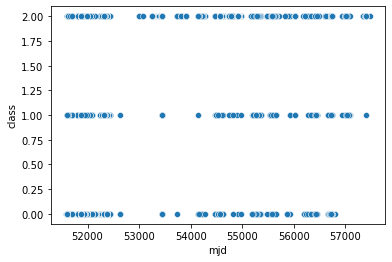

In [25]:
sns.scatterplot(data = df, x = 'mjd', y = 'class')

# Correlation 

In [26]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,fiberid,redshift,plate,mjd,class
objid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ra,NaN,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,NaN,-0.006294,0.594700,-0.095327,0.057485,0.030307,-0.095329,-0.086887,-0.043219
dec,NaN,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,NaN,0.114614,-0.131471,0.088345,0.155012,0.067021,0.088342,0.066147,-0.058918
u,NaN,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,NaN,0.009945,0.008548,-0.129429,0.011301,0.163741,-0.129430,-0.168793,-0.269044
g,NaN,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,NaN,0.010223,0.014651,-0.054979,0.047187,0.407576,-0.054981,-0.092772,-0.099212
r,NaN,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,NaN,0.010747,0.017133,0.019788,0.061081,0.441080,0.019787,-0.009345,0.049628
i,NaN,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,NaN,0.013461,0.019781,0.072960,0.069977,0.431450,0.072958,0.050896,0.146791
z,NaN,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,NaN,0.010930,0.018248,0.112398,0.067980,0.424034,0.112397,0.095658,0.215758
run,NaN,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,NaN,0.151814,-0.463898,0.093604,0.138566,0.059056,0.093601,0.070354,-0.078162
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

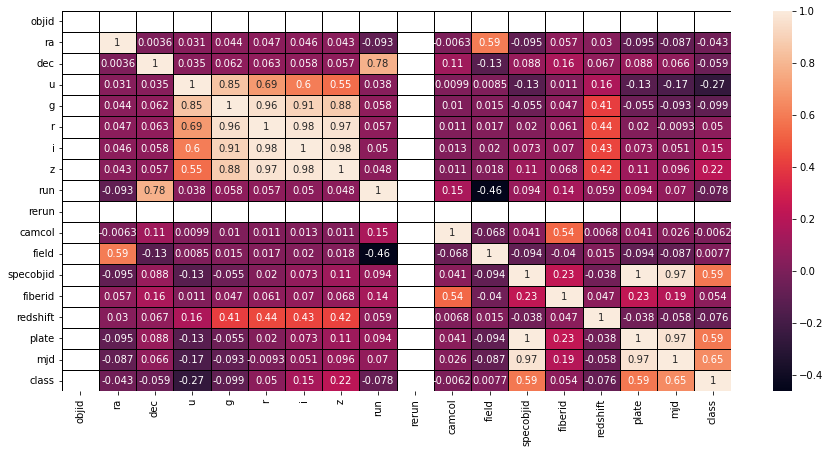

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, linecolor = 'black', linewidth = 0.5)

In [28]:
#Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
#drop target column before calculating VIF on independent features
x = df.drop(["class"], axis =1)

In [30]:
def vif_calc():
    vif = pd.DataFrame()
    vif["VIF factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"] = x.columns
    print(vif)
    
print(vif_calc())

      VIF factor   features
0   0.000000e+00      objid
1   1.009171e+00         ra
2   1.007866e+00        dec
3   1.017037e+00          u
4   1.003032e+00          g
5   1.000392e+00          r
6   1.005352e+00          i
7   1.012795e+00          z
8   1.008839e+00        run
9   0.000000e+00      rerun
10  1.001668e+00     camcol
11  1.008862e+00      field
12  8.824861e+01  specobjid
13  1.055771e+00    fiberid
14  1.001453e+00   redshift
15  1.330981e+09      plate
16  1.535078e+01        mjd
None


In [31]:
#dropping columns which are contributing less to the target column

df1 = df.drop(['plate', 'i', 'g'], axis = 1)
df1

,objid,ra,dec,u,r,z,run,rerun,camcol,field,specobjid,fiberid,redshift,mjd,class
0,1.237650e+18,183.531326,0.089693,19.47406,15.94699,15.22531,752,301,4,267,3.722360e+18,491,-0.000009,54922,2
1,1.237650e+18,183.598370,0.135285,18.66280,16.67637,16.39150,752,301,4,267,3.638140e+17,541,-0.000055,51615,2
2,1.237650e+18,183.680207,0.126185,19.38298,17.47428,16.80125,752,301,4,268,3.232740e+17,513,0.123111,52023,0
3,1.237650e+18,183.870529,0.049911,17.76536,16.16116,15.90438,752,301,4,269,3.722370e+18,510,-0.000111,54922,2
4,1.237650e+18,183.883288,0.102557,17.55025,16.43869,16.61326,752,301,4,269,3.722370e+18,512,0.000590,54922,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,16.91508,16.50570,1345,301,3,161,5.033450e+17,246,0.027583,51877,0
9996,1.237650e+18,131.306083,51.671341,18.27255,17.07692,16.69897,1345,301,3,162,5.033400e+17,228,0.117772,51877,0
9997,1.237650e+18,131.552562,51.666986,18.75818,17.51872,17.42048,1345,301,3,162,8.222620e+18,622,-0.000402,57013,2
9998,1.237650e+18,131.477151,51.753068,18.88287,17.53152,17.13988,1345,301,3,163,5.033400e+17,229,0.014019,51877,0


objid          AxesSubplot(0.125,0.821923;0.0945122x0.0580769)
ra           AxesSubplot(0.238415,0.821923;0.0945122x0.0580...
dec          AxesSubplot(0.351829,0.821923;0.0945122x0.0580...
u            AxesSubplot(0.465244,0.821923;0.0945122x0.0580...
g            AxesSubplot(0.578659,0.821923;0.0945122x0.0580...
r            AxesSubplot(0.692073,0.821923;0.0945122x0.0580...
i            AxesSubplot(0.805488,0.821923;0.0945122x0.0580...
z              AxesSubplot(0.125,0.752231;0.0945122x0.0580769)
run          AxesSubplot(0.238415,0.752231;0.0945122x0.0580...
rerun        AxesSubplot(0.351829,0.752231;0.0945122x0.0580...
camcol       AxesSubplot(0.465244,0.752231;0.0945122x0.0580...
field        AxesSubplot(0.578659,0.752231;0.0945122x0.0580...
specobjid    AxesSubplot(0.692073,0.752231;0.0945122x0.0580...
fiberid      AxesSubplot(0.805488,0.752231;0.0945122x0.0580...
redshift       AxesSubplot(0.125,0.682538;0.0945122x0.0580769)
plate        AxesSubplot(0.238415,0.682538;0.0945122x0.

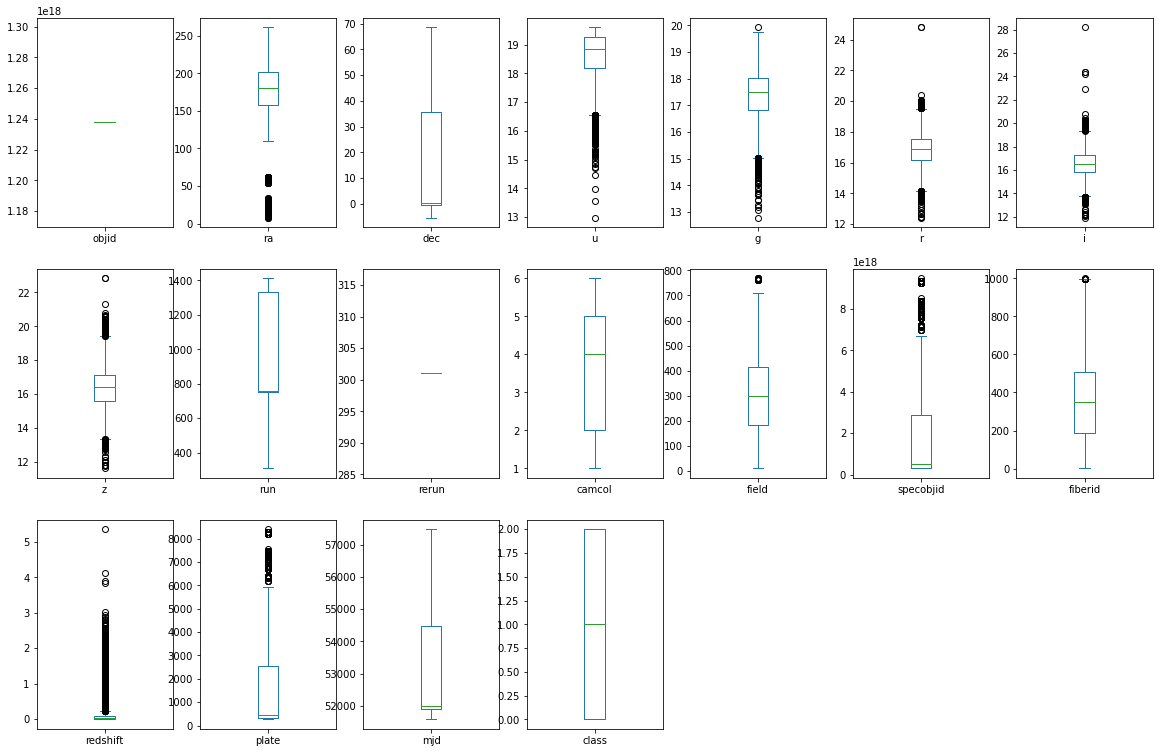

In [32]:
#Checking outliers

df.plot(kind='box', subplots=True, layout=(11,7),figsize=(20,50))

In [33]:
from scipy.stats import zscore

In [34]:
z = pd.DataFrame(zscore(df1))
z.fillna(0, inplace=True)
z = np.abs(z < 3).all(axis=1)
df2 = df1[z]

#Our dataframe columns has non-unique value i.e the column full of categorial value of 1 (objid & rerun).
#Zscore turns these columns into NaN values. np.abs just turns it to True.
#The reason is we have to fillna before "np.abs()" -- replacing NAN with 0s. 

In [35]:
df2

,objid,ra,dec,u,r,z,run,rerun,camcol,field,specobjid,fiberid,redshift,mjd,class
0,1.237650e+18,183.531326,0.089693,19.47406,15.94699,15.22531,752,301,4,267,3.722360e+18,491,-0.000009,54922,2
1,1.237650e+18,183.598370,0.135285,18.66280,16.67637,16.39150,752,301,4,267,3.638140e+17,541,-0.000055,51615,2
2,1.237650e+18,183.680207,0.126185,19.38298,17.47428,16.80125,752,301,4,268,3.232740e+17,513,0.123111,52023,0
3,1.237650e+18,183.870529,0.049911,17.76536,16.16116,15.90438,752,301,4,269,3.722370e+18,510,-0.000111,54922,2
4,1.237650e+18,183.883288,0.102557,17.55025,16.43869,16.61326,752,301,4,269,3.722370e+18,512,0.000590,54922,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1.237650e+18,131.398915,51.533706,17.79613,15.15955,14.33840,1345,301,3,161,5.033460e+17,249,0.055515,51877,0
9995,1.237650e+18,131.316413,51.539547,18.81777,16.91508,16.50570,1345,301,3,161,5.033450e+17,246,0.027583,51877,0
9996,1.237650e+18,131.306083,51.671341,18.27255,17.07692,16.69897,1345,301,3,162,5.033400e+17,228,0.117772,51877,0
9998,1.237650e+18,131.477151,51.753068,18.88287,17.53152,17.13988,1345,301,3,163,5.033400e+17,229,0.014019,51877,0


In [36]:
print(df1.shape)
print(df2.shape)

(10000, 15)
(9170, 15)


In [37]:
#Percentage of data loss

loss = ((10000-9170)/10000)*100
print(loss)

8.3


In [38]:
df2.skew()

objid        0.000000
ra          -1.257904
dec          1.245585
u           -1.191982
r           -0.274482
z            0.069495
run          0.500758
rerun        0.000000
camcol      -0.073781
field        0.245002
specobjid    1.291279
fiberid      0.119180
redshift     4.983859
mjd          0.945830
class        0.264014
dtype: float64

<AxesSubplot:xlabel='ra', ylabel='Density'>

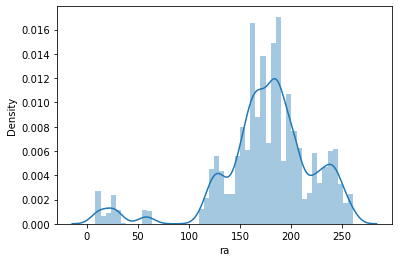

In [39]:
sns.distplot(df['ra'])

<AxesSubplot:xlabel='dec', ylabel='Density'>

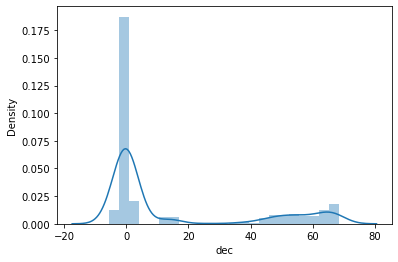

In [40]:
sns.distplot(df['dec'])

<AxesSubplot:xlabel='u', ylabel='Density'>

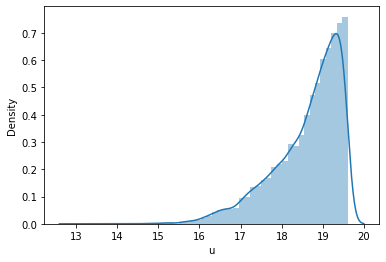

In [41]:
sns.distplot(df['u'])

<AxesSubplot:xlabel='r', ylabel='Density'>

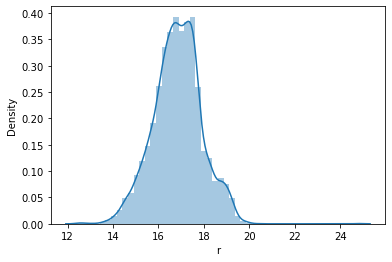

In [42]:
sns.distplot(df['r'])

<AxesSubplot:xlabel='z', ylabel='Density'>

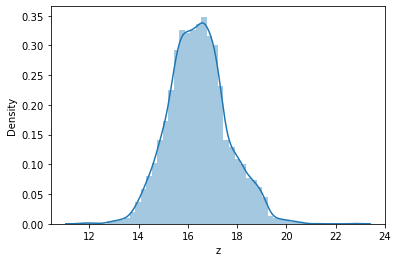

In [43]:
sns.distplot(df['z'])

<AxesSubplot:xlabel='run', ylabel='Density'>

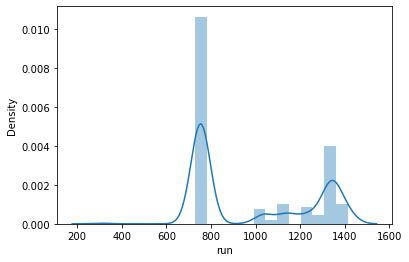

In [44]:
sns.distplot(df['run'])

<AxesSubplot:xlabel='rerun', ylabel='Density'>

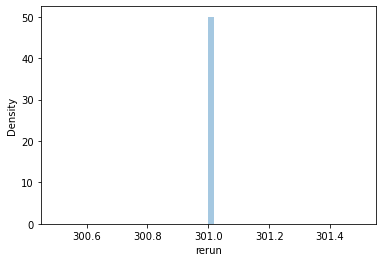

In [45]:
sns.distplot(df['rerun'])

<AxesSubplot:xlabel='camcol', ylabel='Density'>

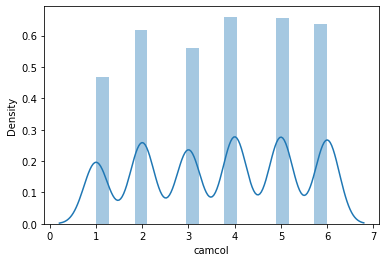

In [46]:
sns.distplot(df['camcol'])

<AxesSubplot:xlabel='field', ylabel='Density'>

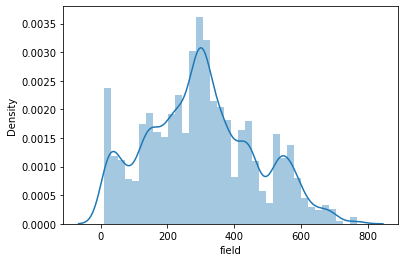

In [47]:
sns.distplot(df['field'])

<AxesSubplot:xlabel='specobjid', ylabel='Density'>

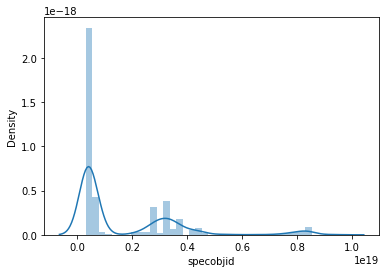

In [48]:
sns.distplot(df['specobjid'])

<AxesSubplot:xlabel='fiberid', ylabel='Density'>

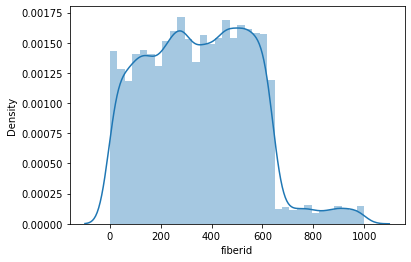

In [49]:
sns.distplot(df['fiberid'])

<AxesSubplot:xlabel='redshift', ylabel='Density'>

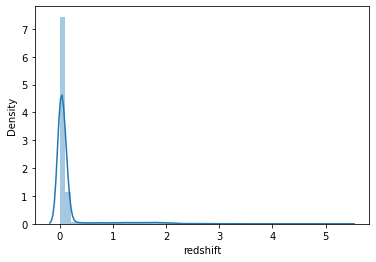

In [50]:
sns.distplot(df['redshift'])

<AxesSubplot:xlabel='mjd', ylabel='Density'>

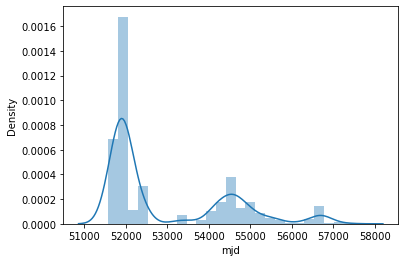

In [51]:
sns.distplot(df['mjd'])

In [52]:
df2.describe()

,objid,ra,dec,u,r,z,run,rerun,camcol,field,specobjid,fiberid,redshift,mjd,class
count,9.170000e+03,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.0,9170.000000,9170.000000,9.170000e+03,9170.000000,9170.000000,9170.000000,9170.000000
mean,1.237650e+18,176.084230,14.356497,18.597697,16.738023,16.299777,972.108397,301.0,3.617448,306.398037,1.346542e+18,339.769575,0.076126,52772.261941,0.869029
std,1.536084e+05,47.767008,24.903555,0.838911,0.997071,1.121098,270.365494,0.0,1.675561,162.194914,1.464961e+18,191.691759,0.167996,1298.666829,0.967444
min,1.237650e+18,8.235100,-5.382632,12.988970,12.431600,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,1.000000,-0.004136,51578.000000,0.000000
25%,1.237650e+18,159.138086,-0.559778,18.141115,16.124003,15.560000,752.000000,301.0,2.000000,193.000000,3.367532e+17,182.000000,0.000080,51899.000000,0.000000
50%,1.237650e+18,180.383852,0.389098,18.832075,16.790390,16.295750,756.000000,301.0,4.000000,300.000000,4.897865e+17,340.500000,0.041932,51990.000000,0.000000
75%,1.237650e+18,202.242396,14.648653,19.249465,17.425072,17.015242,1331.000000,301.0,5.000000,418.000000,2.880090e+18,496.750000,0.086705,54208.000000,2.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.590280,20.021230,1412.000000,301.0,6.000000,768.000000,7.685640e+18,970.000000,1.309529,56717.000000,2.000000


In [53]:
X = df2.drop(['class'], axis = 1)
Y = df2['class']

In [54]:
#transforming data to remobve skewness

from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[ 3.22781235e+119,  6.10227184e-002, -2.82300808e-001, ...,
         8.00448296e-001, -1.02009900e+000,  8.32667268e-016],
       [ 3.22781235e+119,  6.26733185e-002, -2.70212051e-001, ...,
         1.02039295e+000, -1.02149716e+000, -4.99600361e-016],
       [ 3.22781235e+119,  6.46886924e-002, -2.72592636e-001, ...,
         8.97960117e-001,  1.19075869e+000, -3.33066907e-016],
       ...,
       [ 3.22781235e+119, -1.08620157e+000,  1.36098506e+000, ...,
        -4.89942615e-001,  1.13758433e+000, -3.88578059e-016],
       [ 3.22781235e+119, -1.08290854e+000,  1.36189555e+000, ...,
        -4.84420872e-001, -6.21237635e-001, -3.88578059e-016],
       [ 3.22781235e+119, -1.07928863e+000,  1.36247692e+000, ...,
        -4.62400735e-001,  1.14414230e+000, -3.88578059e-016]])

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df2)
X

array([[ 0.        ,  0.15591309, -0.57291345, ..., -0.45321882,
         1.65543251,  1.16909335],
       [ 0.        ,  0.15731675, -0.57108261, ..., -0.4534923 ,
        -0.89116394,  1.16909335],
       [ 0.        ,  0.15903009, -0.57144804, ...,  0.27969816,
        -0.57697847, -0.89832272],
       ...,
       [ 0.        , -0.93747947,  1.49845591, ...,  0.24791585,
        -0.68940758, -0.89832272],
       [ 0.        , -0.93389796,  1.50173784, ..., -0.36971271,
        -0.68940758, -0.89832272],
       [ 0.        , -0.92996488,  1.50383564, ...,  0.25175604,
        -0.68940758, -0.89832272]])

In [56]:
X = pd.DataFrame(X)

# Train test split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [60]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, multi_class='multinomial')
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=5)
cvs.mean()

[[988   0   0]
 [  0  84   0]
 [  0   1 761]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       0.99      1.00      0.99        84
           2       1.00      1.00      1.00       762

    accuracy                           1.00      1834
   macro avg       1.00      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834

0.9994547437295529


0.9997818974918211

In [61]:
#DescisonTree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(dt, X, Y, cv=5)
cvs.mean()

[[988   0   0]
 [  0  84   0]
 [  0   0 762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       762

    accuracy                           1.00      1834
   macro avg       1.00      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834

1.0


1.0

In [62]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rf, X, Y, cv=5)
cvs.mean()

[[988   0   0]
 [  0  84   0]
 [  0   0 762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       762

    accuracy                           1.00      1834
   macro avg       1.00      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834

1.0


0.9998909487459106

In [63]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(svc, X, Y, cv=5)
cvs.mean()

[[986   2   0]
 [  0  84   0]
 [  0   0 762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       0.98      1.00      0.99        84
           2       1.00      1.00      1.00       762

    accuracy                           1.00      1834
   macro avg       0.99      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834

0.9989094874591058


0.9992366412213741

In [64]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(knn, X, Y, cv=5)
cvs.mean()

[[980   3   5]
 [ 11  73   0]
 [  1   0 761]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       988
           1       0.96      0.87      0.91        84
           2       0.99      1.00      1.00       762

    accuracy                           0.99      1834
   macro avg       0.98      0.95      0.97      1834
weighted avg       0.99      0.99      0.99      1834

0.9890948745910578


0.9865866957470011

In [65]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
pred = nb.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(nb, X, Y, cv=5)
cvs.mean()

[[988   0   0]
 [  0  84   0]
 [  0   0 762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       762

    accuracy                           1.00      1834
   macro avg       1.00      1.00      1.00      1834
weighted avg       1.00      1.00      1.00      1834

1.0


1.0

# Hyperparameter Tuning 

In [66]:
from sklearn.model_selection import RandomizedSearchCV

criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_depth = range(1, 9900, 300)
min_samples_split = range(1, 9000, 300)
min_samples_leaf = range(1, 9000, 300)
max_features = ['auto', 'sqrt', 'log2']

random_grid = {'criterion' : criterion,
               'splitter' : splitter,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_features' : max_features}

random_grid

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': range(1, 9900, 300),
 'min_samples_split': range(1, 9000, 300),
 'min_samples_leaf': range(1, 9000, 300),
 'max_features': ['auto', 'sqrt', 'log2']}

In [67]:
dt = DecisionTreeClassifier()
rscv = RandomizedSearchCV(estimator = dt,
                         param_distributions = random_grid,
                         cv = 10,
                         random_state = 25,
                         verbose = 2,
                         n_jobs = -1)

rscv.fit(X_train, Y_train)
rscv

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 9900, 300),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 9000, 300),
                                        'min_samples_split': range(1, 9000, 300),
                                        'splitter': ['best', 'random']},
                   random_state=25, verbose=2)

In [68]:
rscv.best_params_

{'splitter': 'random',
 'min_samples_split': 2401,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 6601,
 'criterion': 'log_loss'}

In [69]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=6601,
                       max_features='sqrt', min_samples_split=2401,
                       splitter='random')

In [70]:
best_rscv = rscv.best_estimator_
pred_rscv = best_rscv.predict(X_test)

print(confusion_matrix(Y_test, pred_rscv))
print(classification_report(Y_test, pred_rscv))
print(accuracy_score(Y_test, pred_rscv))
cvs = cross_val_score(rscv, X, Y, cv=10)
cvs.mean()

[[988   0   0]
 [ 84   0   0]
 [  0   0 762]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       988
           1       0.00      0.00      0.00        84
           2       1.00      1.00      1.00       762

    accuracy                           0.95      1834
   macro avg       0.64      0.67      0.65      1834
weighted avg       0.91      0.95      0.93      1834

0.9541984732824428
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totall

0.8695747001090511

In [71]:
import pickle
filename = 'Space Server Project.pkl'
pickle.dump(dt, open(filename, 'wb'))